In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import re
import tarfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
EXTRACTED_PATH = "/content/drive/MyDrive/TuteDude/NLP/Assignment1/Data/Extracted_data/20_newsgroups"

#PART 1 - Load and explore data

In [4]:
documents = []

for category in os.listdir(EXTRACTED_PATH):
    cat_path = os.path.join(EXTRACTED_PATH, category)

    for file in os.listdir(cat_path):
        path = os.path.join(cat_path, file)

        try:
            with open(path, "r", encoding="utf-8", errors="ignore") as f:
                text = f.read()
        except:
            continue

        words = re.findall(r"\b\w+\b", text)
        sentences = re.split(r"[.!?]+", text)

        documents.append({
            "doc_id": file,
            "category": category,
            "filename": file,
            "characters": len(text),
            "words": len(words),
            "sentences": len(sentences),
            "avg_word_length": np.mean([len(w) for w in words]) if words else 0,
            "avg_sentence_length": np.mean([len(s.split()) for s in sentences if s.strip()])
        })

doc_data = pd.DataFrame(documents)

doc_data.head()

,doc_id,category,filename,characters,words,sentences,avg_word_length,avg_sentence_length
0,178389,talk.politics.misc,178389,2011,309,111,4.621359,3.000000
1,178391,talk.politics.misc,178391,3176,558,97,4.304659,5.474227
2,178358,talk.politics.misc,178358,1855,271,99,4.464945,3.065934
3,178363,talk.politics.misc,178363,1622,276,76,4.485507,3.328947
4,178364,talk.politics.misc,178364,2142,355,86,4.408451,3.930233


In [5]:
doc_data.to_csv("/content/drive/MyDrive/TuteDude/NLP/Assignment1/Data/Processed_data/processed_dats.csv")

#PART 2 - Data extraction using regular expressions

In [4]:
import pandas as pd


doc_data = pd.read_csv("/content/drive/MyDrive/TuteDude/NLP/Assignment1/Data/Processed_data/processed_dats.csv")

In [6]:
all_text = ""

for row in doc_data.itertuples():
    path = os.path.join(EXTRACTED_PATH, row.category, str(row.filename))
    with open(path, "r", encoding="utf-8", errors="ignore") as f:
        all_text += f.read() + "\n"

# EMAILS
emails = re.findall(r"[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Za-z]{2,}", all_text)

# PHONES
phones = re.findall(r"(?:\+?\d{1,2}[- ]?)?\(?\d{3}\)?[- ]?\d{3}[- ]?\d{4}", all_text)

def normalize_phone(p):
    digits = re.sub(r"\D", "", p)
    if len(digits) >= 10:
        return f"{digits[-10:-7]}-{digits[-7:-4]}-{digits[-4:]}"
    return p

phones = [normalize_phone(p) for p in phones]

# URLs
urls = re.findall(r"https?://[^\s]+", all_text)
domains = [re.findall(r"https?://([^/]+)", u)[0] for u in urls]

# DATES
dates = re.findall(r"\b\d{1,2}[/-]\d{1,2}[/-]\d{2,4}\b|\b[A-Za-z]+ \d{1,2}, \d{4}", all_text)

# CURRENCY
currency = re.findall(r"[$£€]\d+(?:\.\d+)?", all_text)


In [7]:
print("Unique Emails:", len(set(emails)))
print("Phone Numbers:", len(phones))
print("URLs:", len(urls))

Unique Emails: 40587
Phone Numbers: 7893
URLs: 2


#PART3 - Text Statistics with NumPy

In [8]:
words = re.findall(r"\b\w+\b", all_text.lower())

# Frequency
freq = {}
for w in words:
    freq[w] = freq.get(w, 0) + 1

freq_arr = np.array(list(freq.values()))

print("Mean:", np.mean(freq_arr))
print("Median:", np.median(freq_arr))
print("Std:", np.std(freq_arr))
print("Percentiles:", np.percentile(freq_arr, [25,50,75]))

# Character Analysis
chars = list(all_text.lower())
char_counts = {c: chars.count(c) for c in set(chars)}

vowels = sum(char_counts.get(c,0) for c in "aeiou")
consonants = sum(char_counts.get(c,0) for c in "bcdfghjklmnpqrstvwxyz")

print("Vowel/Consonant ratio:", vowels/(consonants+1))

# Sentence lengths
sentences = [s.strip() for s in re.split(r"[.!?]+", all_text) if s.strip()]
sent_lengths = np.array([len(s.split()) for s in sentences])




Mean: 37.134653219490765
Median: 2.0
Std: 1067.047431688365
Percentiles: [1. 2. 4.]
Vowel/Consonant ratio: 0.6001017388700012


In [9]:
print("Longest:", max(sent_lengths))
print("Shortest:", min(sent_lengths))

Longest: 1539
Shortest: 1


#PART 4 -Data Visualization with Matplotlib

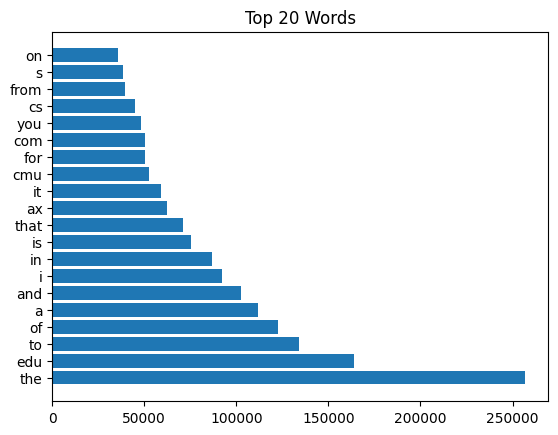

In [10]:
# Top 20 words
top20 = sorted(freq.items(), key=lambda x:x[1], reverse=True)[:20]
words20, counts20 = zip(*top20)

plt.figure()
plt.barh(words20, counts20)
plt.title("Top 20 Words")
plt.savefig("/content/drive/MyDrive/TuteDude/NLP/Assignment1/Results/top20_words.png")
plt.show()



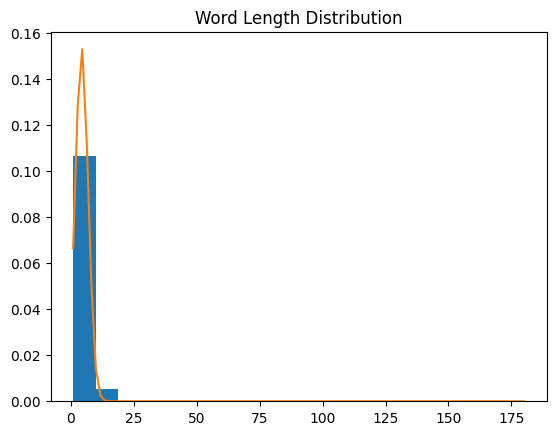

In [11]:
# Word length histogram
lengths = [len(w) for w in words]
plt.figure()
plt.hist(lengths, bins=20, density=True)

mu, sigma = np.mean(lengths), np.std(lengths)
x = np.linspace(min(lengths), max(lengths), 100)
y = (1/(sigma*np.sqrt(2*np.pi))) * np.exp(-(x-mu)**2/(2*sigma**2))
plt.plot(x,y)
plt.title("Word Length Distribution")
plt.savefig("/content/drive/MyDrive/TuteDude/NLP/Assignment1/Results/word_length.png")
plt.show()

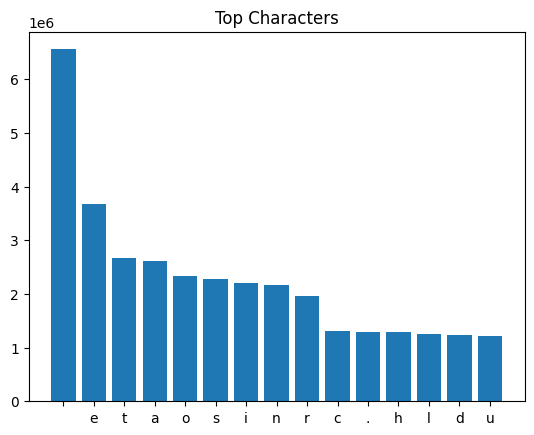

In [12]:
# Character frequency
top_chars = sorted(char_counts.items(), key=lambda x:x[1], reverse=True)[:15]
c,v = zip(*top_chars)

plt.figure()
plt.bar(c,v)
plt.title("Top Characters")
plt.savefig("/content/drive/MyDrive/TuteDude/NLP/Assignment1/Results/character_frequency.png")
plt.show()

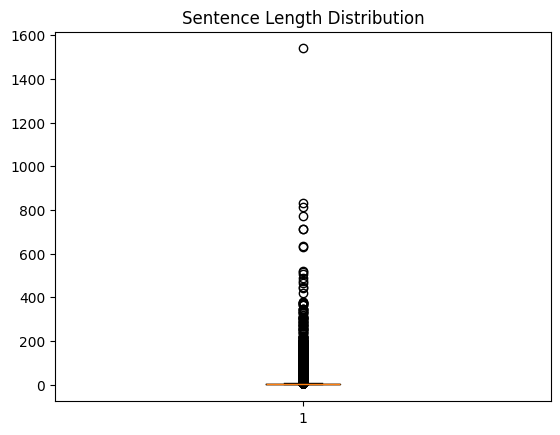

In [13]:
# Sentence length boxplot
plt.figure()
plt.boxplot(sent_lengths)
plt.title("Sentence Length Distribution")
plt.savefig("/content/drive/MyDrive/TuteDude/NLP/Assignment1/Results/sentence_length.png")
plt.show()

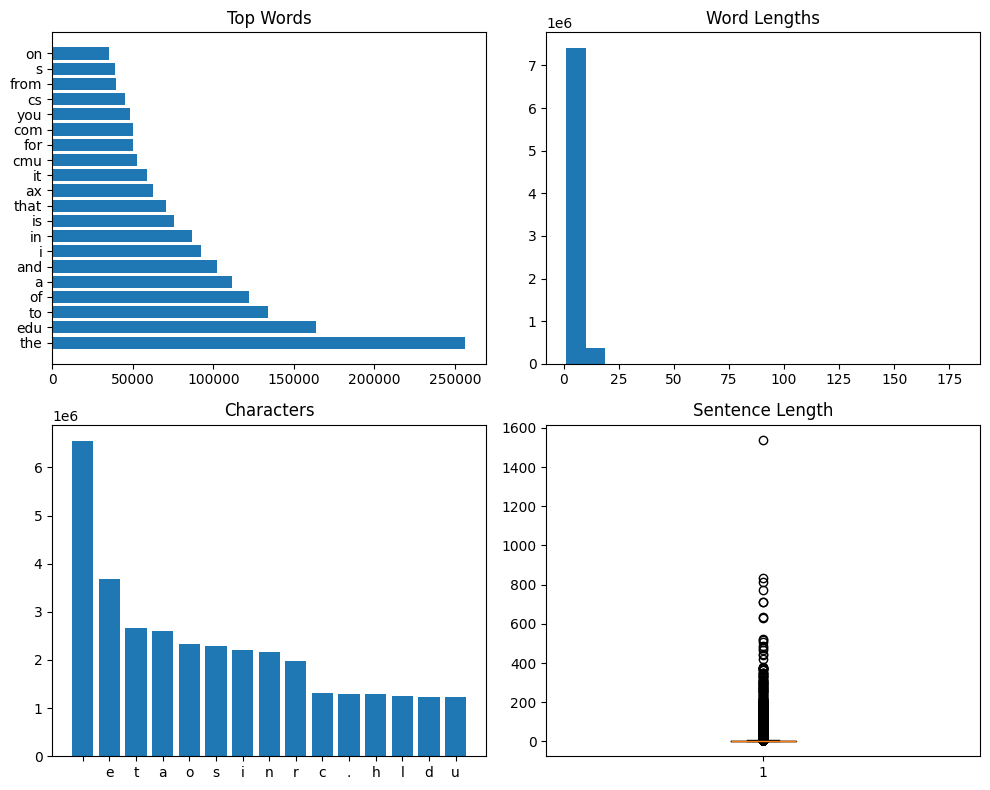

In [14]:
# Dashboard
fig,ax = plt.subplots(2,2, figsize=(10,8))

ax[0,0].barh(words20, counts20)
ax[0,0].set_title("Top Words")

ax[0,1].hist(lengths,bins=20)
ax[0,1].set_title("Word Lengths")

ax[1,0].bar(c,v)
ax[1,0].set_title("Characters")

ax[1,1].boxplot(sent_lengths)
ax[1,1].set_title("Sentence Length")

plt.tight_layout()
plt.savefig("/content/drive/MyDrive/TuteDude/NLP/Assignment1/Results/dashboard.png")
plt.show()


#PART 5 - Pandas Data Analysis

In [16]:
df_words = pd.DataFrame({
    "word": list(freq.keys()),
    "frequency": list(freq.values())
})

df_words["length"] = df_words["word"].str.len()
df_words["first_char"] = df_words["word"].str[0]
df_words["vowel_count"] = df_words["word"].str.count(r"[aeiou]")

df_words.set_index("word", inplace=True)

# Groupby length
print(df_words.groupby("length")[["frequency", "vowel_count"]].mean())


# Groupby first letter
print(df_words.groupby("first_char").sum())

# Filters
print(df_words.sort_values("frequency", ascending=False).head(50))
print(df_words[df_words["length"] > 10])

# Pivot
pivot = pd.pivot_table(df_words, values="frequency",
                       index="first_char",
                       columns="length",
                       fill_value=0)



           frequency  vowel_count
length                           
1       14810.162162     0.135135
2         979.530314     0.270270
3          69.871980     0.432305
4          42.520768     0.609602
5          19.719759     0.695381
...              ...          ...
79         22.666667    21.666667
80         20.000000     2.250000
81          1.000000     0.000000
86          2.000000     2.000000
180         1.000000    30.000000

[83 rows x 2 columns]
            frequency  length  vowel_count
first_char                                
0               54142   28013         1021
1              185190  123999         6479
2               90442   49084         1281
3               50665   20890          932
4               37173   15659          793
5               35035   18787          790
6               26285   20793          950
7               26039   28947          821
8               21498   14762          782
9               31391   23860         1262
_               169

In [17]:
pivot.head()

length,1,2,3,4,5,6,7,8,9,10,...,74,75,76,77,78,79,80,81,86,180
first_char,,,,,,,,,,,,,,,,,,,,,
0,14929.0,649.405405,5.761824,4.388383,2.129973,2.474900,1.494624,2.173913,2.005714,2.903226,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,26135.0,1409.945946,18.997409,20.135508,2.396654,2.335279,2.310680,9.172702,40.055928,2.704545,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,17095.0,1100.351351,15.132231,4.148230,2.326624,2.500000,1.994048,2.299107,1.306122,1.636364,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,14504.0,539.918919,11.247580,3.207377,1.681969,2.270408,1.887006,1.322034,1.138889,1.750000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9802.0,418.945946,9.120499,2.510798,1.591100,1.892857,1.708738,1.229167,1.111111,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
